In [134]:
! pip install --user sklearn

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [135]:
#loading dataset in pandas datafream
diabetes_dataset=pd.read_csv("diabetes.csv")
diabetes_dataset.head(5)#readng 8 rows from dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [136]:
#printing row and col of dataset using shape method of pandas return rows and col
diabetes_dataset.shape 

(2000, 9)

In [137]:
#get use full info of datafream using describe method 
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


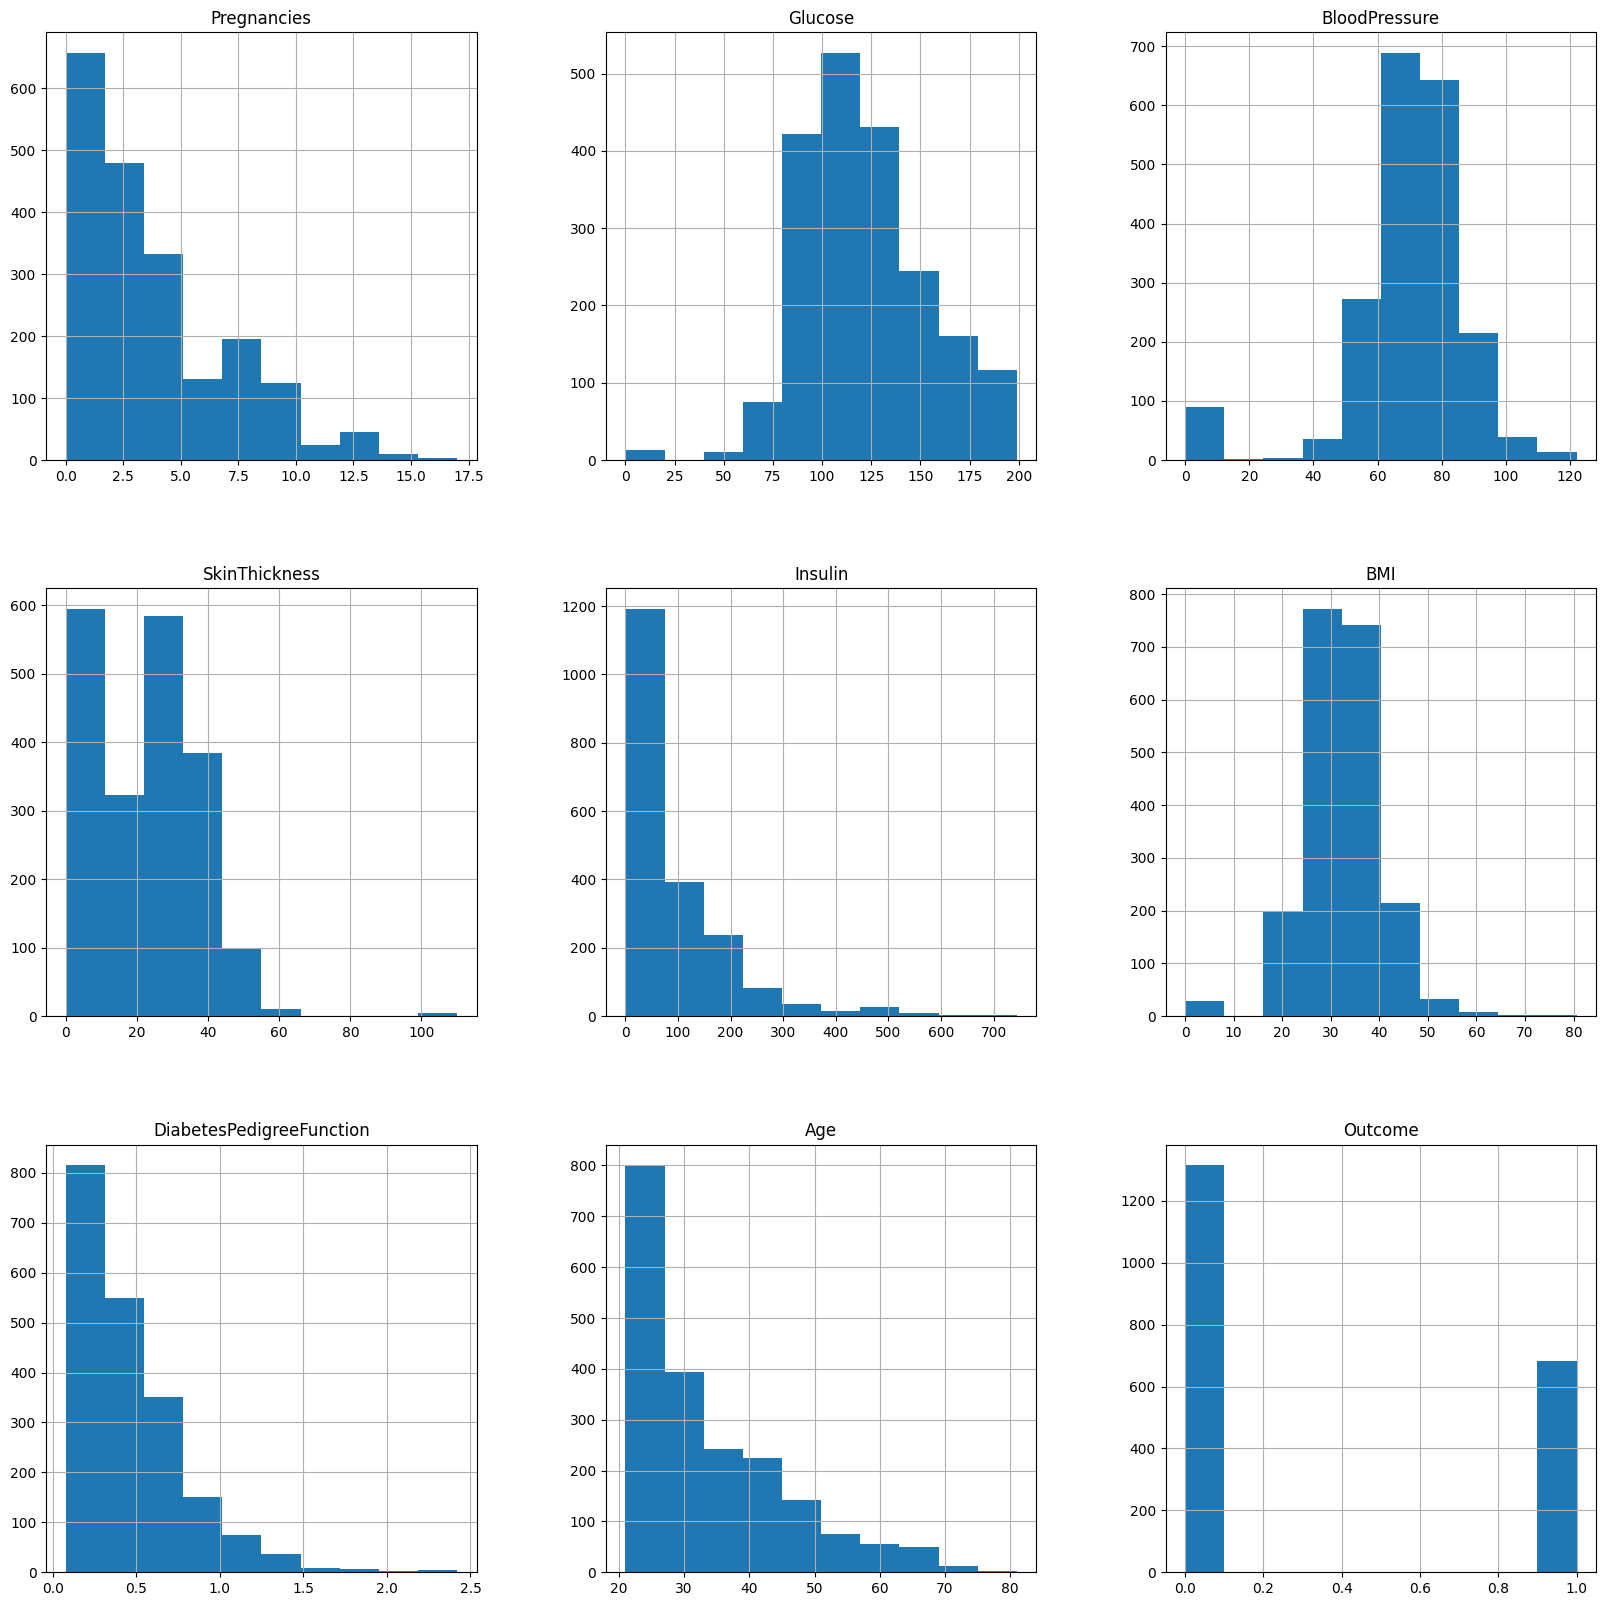

In [138]:
p = diabetes_dataset.hist(figsize = (20,20))




Outcome
0    1316
1     684
Name: count, dtype: int64

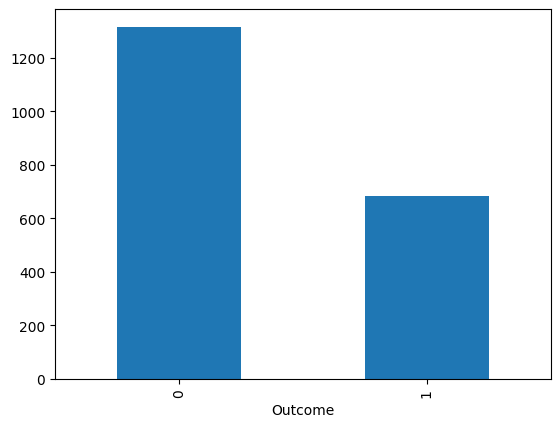

In [139]:
p=diabetes_dataset.Outcome.value_counts().plot(kind="bar")
#HOW many are diabetic and non diabtic method using method value_counts()
diabetes_dataset['Outcome'].value_counts()

In [140]:
#mean of data on the basics of "outcome" here i am trying to find what is main cause of diabeties from given data set
diabetes_dataset.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


In [141]:
#separting the data and lebals
x=diabetes_dataset.drop(columns='Outcome',axis=1)#droping col 
y=diabetes_dataset['Outcome']
x.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [142]:
#data stand
x=diabetes_dataset.drop(columns='Outcome',axis=1)#droping col 
y=diabetes_dataset['Outcome']

In [143]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform your data
Standard_data = scaler.fit_transform(x)

# Print the scaled data
print(Standard_data)

Standard_data=scaler.transform(x)

print(Standard_data)#all data will be become between 0,1

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [144]:
x=Standard_data
y=diabetes_dataset['Outcome']
print('x',x)
print('y',y)

x [[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
y 0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


In [145]:
#train test split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=2)#0.2 20% test data 
print(x.shape,x_train.shape,x_test.shape)


(2000, 8) (1400, 8) (600, 8)


In [146]:
#train the model svm
svmclassifier=svm.SVC(kernel='linear')
svmclassifier.fit(x_train,y_train)#x_train is data and y_train is lebal
 

SVC(kernel='linear')

In [147]:
#model evalvation /accuracy scoure training data svm
from sklearn import metrics

x_train_preduction=svmclassifier.predict(x_train)
training_accuracy_score=accuracy_score(x_train_preduction,y_train)
training_accuracy_score


0.7735714285714286

In [148]:
#accuracy scoure test data svm
x_test_preduction=svmclassifier.predict(x_test)
test_accuracy_score=accuracy_score(x_test_preduction,y_test)
svmacc=test_accuracy_score
test_accuracy_score


0.805

In [149]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,
                                max_features = 'auto', max_depth = 10)
rfc.fit(x_train, y_train)


c:\Users\Farman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       random_state=0)

In [150]:
#rfc_train = rfc.predict(x_train)
#model evalvation /accuracy scoure training data
x_train_preduction=rfc.predict(x_train)
training_accuracy_score=accuracy_score(x_train_preduction,y_train)
training_accuracy_score


0.9985714285714286

In [151]:
#accuracy scoure test data rfc
x_test_preduction=rfc.predict(x_test)
test_accuracy_score=accuracy_score(x_test_preduction,y_test)
rfcacc=test_accuracy_score
test_accuracy_score


0.96

In [152]:

#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier()

In [153]:
#model evalvation /accuracy scoure training data dst
x_train_preduction=dtree.predict(x_train)
training_accuracy_score=accuracy_score(x_train_preduction,y_train)
training_accuracy_score


1.0

In [154]:
#accuracy scoure test data dst
x_test_preduction=dtree.predict(x_test)
test_accuracy_score=accuracy_score(x_test_preduction,y_test)
dstacc=test_accuracy_score
test_accuracy_score


0.9616666666666667

In [155]:

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [158]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [157]:
print("svm : acc :", svmacc)
print("rfc : acc :", rfcacc)
print("Dtree : acc :", dstacc)
inputdata=(12,140,82,43,325,39.2,0.528,58)
npa=np.asarray(inputdata)
inx=npa.reshape(1,-1)
std_scal=scaler.transform(inx)
std_scal
pre=svmclassifier.predict(std_scal)
print(pre)
pre2=rfc.predict(std_scal)
print(pre2)
pre3=dtree.predict(std_scal)
print(pre3)


svm : acc : 0.805
rfc : acc : 0.96
Dtree : acc : 0.9616666666666667
[1]
[1]
[1]


c:\Users\Farman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
